In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
np.random.seed(0)
first = np.random.normal(3,2,400)
second = np.random.normal(6,2,400)
stats.ttest_ind(second,first, axis=0, equal_var=True)

Ttest_indResult(statistic=20.007555929348122, pvalue=1.7337236134368438e-72)

In [15]:
399*399

159201

In [66]:
sales = pd.read_csv('Store.csv')

In [67]:
sales.head()

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,66490
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,39820
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,54010
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,53730
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,46620


In [68]:
sales.shape

(932, 10)

In [69]:
sales.isna().sum()

Observation              0
Dist_Taxi               13
Dist_Market             13
Dist_Metro               1
Store_Area               8
Items_Available         15
Parking                  0
Coupon_Category          0
Daily_Customer_Count     0
Store_Sales              0
dtype: int64

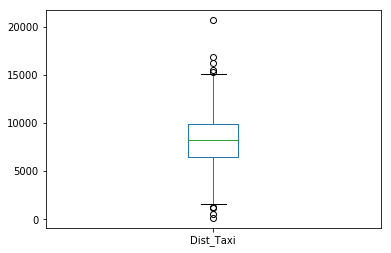

In [70]:
sales.Dist_Taxi.plot(kind ='box')

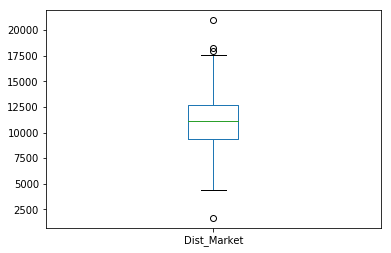

In [71]:
sales.Dist_Market.plot(kind ='box')

In [72]:
sales.Dist_Taxi.fillna(sales.Dist_Taxi.median(),inplace =True)

In [73]:
sales.Dist_Market.fillna(sales.Dist_Market.median(),inplace =True)
sales.Store_Area.fillna(sales.Store_Area.median(),inplace =True)
sales.Items_Available.fillna(sales.Items_Available.median(),inplace=True)
sales.Dist_Metro.fillna(sales.Dist_Metro.median(),inplace=True)

In [74]:
sales.isna().sum()

Observation             0
Dist_Taxi               0
Dist_Market             0
Dist_Metro              0
Store_Area              0
Items_Available         0
Parking                 0
Coupon_Category         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

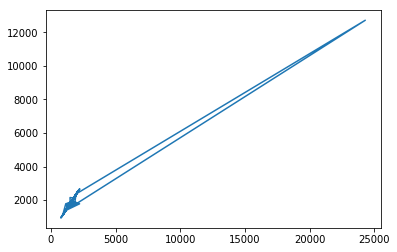

In [76]:
plt.plot(sales.Store_Area,sales.Items_Available)

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


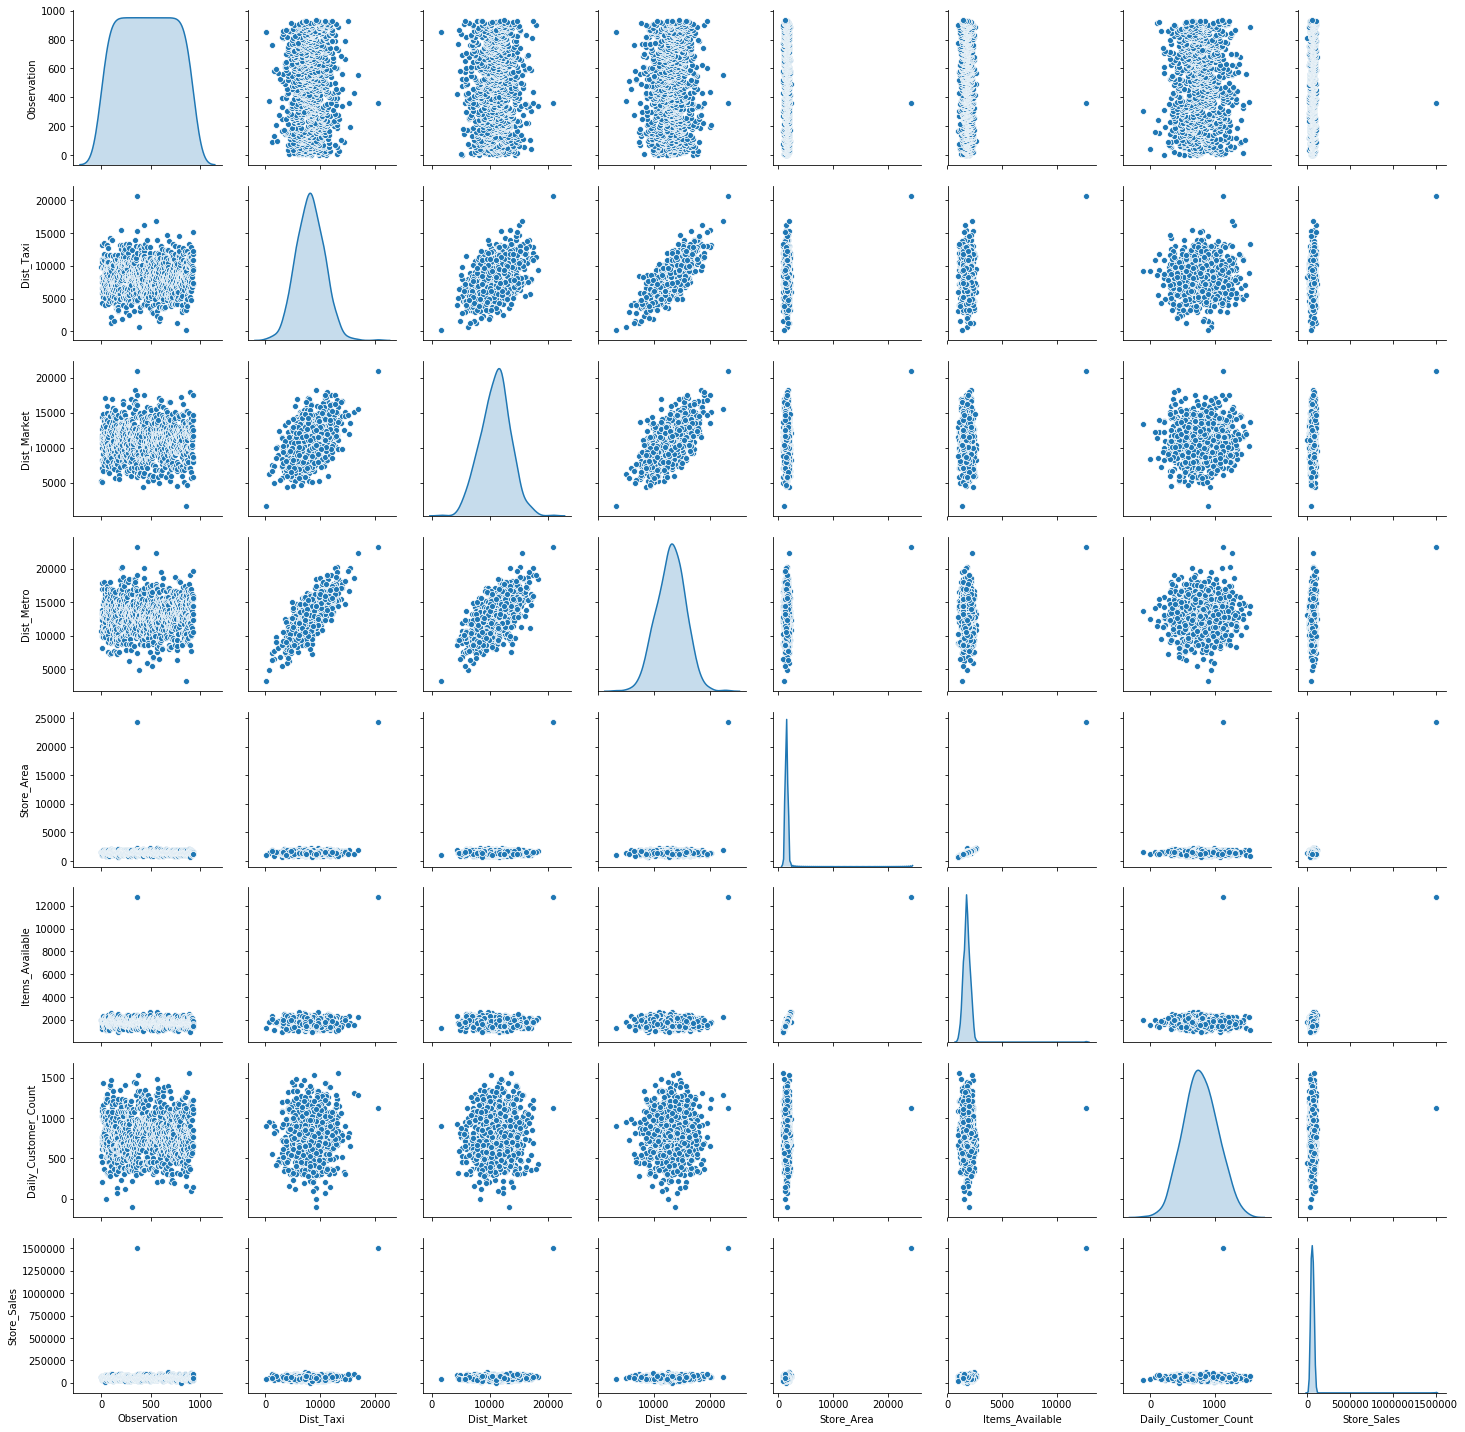

In [77]:
sns.pairplot(data =sales,diag_kind='kde')

In [78]:
sales[sales.Store_Area==sales.Store_Area.max()]

,Observation,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
360,361,20662.0,20945.0,23294.0,24300.0,12730.0,Covered,CAT B,1130,1500000


In [79]:
ssales2 =sales.drop(360,axis=0)

In [80]:
ssales2.shape

(931, 10)

In [81]:
ssales2.Parking.value_counts()

Open            372
Not Provided    227
Covered         187
No Parking      145
Name: Parking, dtype: int64

In [82]:
# ssales2.Parking.count()-

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


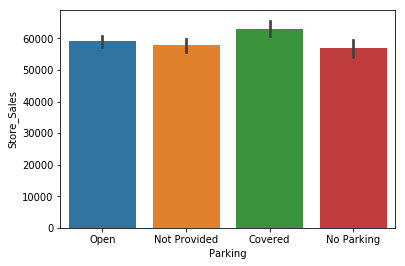

In [84]:
sns.barplot(ssales2.Parking,ssales2.Store_Sales)

In [85]:
#bar is CI about mean

In [86]:
ssales2.Store_Sales.groupby(ssales2.Parking).mean()

Parking
Covered         63109.732620
No Parking      56994.620690
Not Provided    57747.048458
Open            59233.978495
Name: Store_Sales, dtype: float64

In [93]:
# ssales2[ssales2.Store_Area==ssales2.Store_Area.max()]

In [94]:
grouped_test2=ssales2[['Parking','Store_Sales']].groupby(['Parking'])
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Covered')['Store_Sales'], grouped_test2.get_group('Not Provided')['Store_Sales'],grouped_test2.get_group('No Parking')['Store_Sales'], grouped_test2.get_group('Open')['Store_Sales'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 4.553203069106293 , P = 0.003557490827377511


In [96]:
crit = stats.f.ppf(q = 1-0.05, dfn = 3, dfd = 927)
print('F critical value for 3 and 927 df with .95 confidence %3.2f' %crit)

F critical value for 3 and 927 df with .95 confidence 2.61


In [92]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Store_Sales ~ Parking', data = ssales2).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

             df        sum_sq       mean_sq         F    PR(>F)
Parking     3.0  4.033839e+09  1.344613e+09  4.553203  0.003557
Residual  927.0  2.737537e+11  2.953114e+08       NaN       NaN


In [97]:
#check p value __/^

In [98]:
###########Now comparing parking covered and Parking not provided

In [99]:
# t test 


In [100]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats

In [101]:
t_statistic, p_value  =  stats.ttest_ind(grouped_test2.get_group('Not Provided')['Store_Sales'],grouped_test2.get_group('Covered')['Store_Sales'])

In [104]:
print("t-test=", t_statistic, " p value=", p_value)

t-test= -3.1502380424373726  p value= 0.0017503522949873288


In [105]:
# this is 2 side p value so divide by 2
pvalue =(p_value/2)
print(pvalue)

0.0008751761474936644


In [106]:
1-pvalue

0.9991248238525063

In [107]:
ssales2.Coupon_Category.value_counts()

CAT B    364
CAT A    329
CAT C    238
Name: Coupon_Category, dtype: int64

In [114]:
##########coupon and Parking both are categorical

In [115]:
###chi square bcz proportion

In [122]:
coupn_prking_array =pd.crosstab(ssales2.Coupon_Category,ssales2.Parking)
coupn_prking_array

Parking,Covered,No Parking,Not Provided,Open
Coupon_Category,,,,
CAT A,75,51,82,121
CAT B,63,53,89,159
CAT C,49,41,56,92


In [123]:
type(coupn_prking_array)

pandas.core.frame.DataFrame

In [128]:
import scipy

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(coupn_prking_array)


print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))


Chi-square statistic 5.59851 P value 0.469631 Degrees of freedom 6


In [126]:
stats.chi2_contingency(coupn_prking_array)

(5.598509055616617,
 0.4696314046542073,
 6,
 array([[ 66.08270677,  51.2406015 ,  80.21804511, 131.45864662],
        [ 73.11278195,  56.69172932,  88.7518797 , 145.44360902],
        [ 47.80451128,  37.06766917,  58.03007519,  95.09774436]]))

In [129]:
###these are independent 

In [130]:
######is any relation bwtween sales and these parking and coupons

In [ ]:
###2 way anova

In [134]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm


mod = ols('Store_Sales ~ Parking + Coupon_Category + Parking:Coupon_Category', data = ssales2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

                               sum_sq     df           F         PR(>F)
Parking                  3.023414e+09    3.0    6.161800   3.792762e-04
Coupon_Category          1.233702e+11    2.0  377.147746  2.581362e-120
Parking:Coupon_Category  7.474572e+07    6.0    0.076167   9.983139e-01
Residual                 1.503087e+11  919.0         NaN            NaN


In [132]:
ssales2.groupby('Coupon_Category').Store_Sales.mean()

Coupon_Category
CAT A    73998.662614
CAT B    55233.214286
CAT C    45205.504202
Name: Store_Sales, dtype: float64

In [136]:
#null hypo is there is no interation effect
# alternative is there is effect due to interaction

#there is independent effect on sales with parking and Coupons#check p value

In [137]:
coupn_prking_array =pd.crosstab(ssales2.Coupon_Category,ssales2.Parking)
# coupn_prking_array

In [153]:
aa = ssales2.Store_Sales.groupby([ssales2.Coupon_Category,ssales2.Parking]).mean()
aa

Coupon_Category  Parking     
CAT A            Covered         77047.333333
                 No Parking      71999.607843
                 Not Provided    72015.975610
                 Open            74295.206612
CAT B            Covered         58140.793651
                 No Parking      53021.886792
                 Not Provided    53213.595506
                 Open            55948.742138
CAT C            Covered         48165.306122
                 No Parking      43465.365854
                 Not Provided    44058.214286
                 Open            45102.934783
Name: Store_Sales, dtype: float64

In [154]:
 pd.pivot_table(pd.DataFrame(aa), values = "Store_Sales", columns = "Parking", index = "Coupon_Category")

Parking,Covered,No Parking,Not Provided,Open
Coupon_Category,,,,
CAT A,77047.333333,71999.607843,72015.975610,74295.206612
CAT B,58140.793651,53021.886792,53213.595506,55948.742138
CAT C,48165.306122,43465.365854,44058.214286,45102.934783


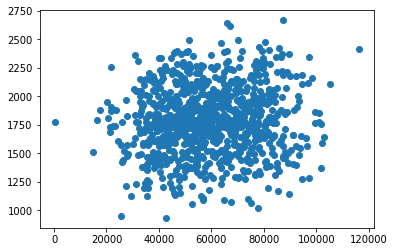

In [159]:
plt.scatter(ssales2.Store_Sales,ssales2.Items_Available)

In [160]:
# sns.barplot(ssales2.Store_Sales,ssales2.Items_Available)

In [162]:
ssales2.Items_Available.median()

1774.0

In [167]:
less1774=ssales2[ssales2.Items_Available <1774]
more1774=ssales2[ssales2.Items_Available >=1774]

In [169]:
# Ho - mean less =mean more
# ha - mean not equal

In [170]:
t_statistic, p_value  =  stats.ttest_ind(less1774.Store_Sales,more1774.Store_Sales)

In [171]:
print("t-test=", t_statistic, " p value=", p_value)

t-test= -1.4566367674783354  p value= 0.14555456301795072


In [172]:
# ho is true in statistical way

In [173]:
print(less1774.Store_Sales.mean(),more1774.Store_Sales.mean())

58459.56140350877 60109.05263157895


In [174]:
######checking store area

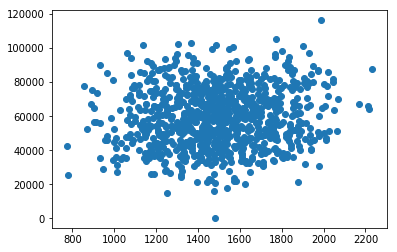

In [175]:
plt.scatter(ssales2.Store_Area,ssales2.Store_Sales,)

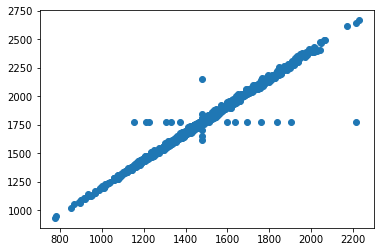

In [176]:
plt.scatter(ssales2.Store_Area,ssales2.Items_Available)

In [186]:
lessstore=ssales2[ssales2.Store_Area <1480]
morestore=ssales2[ssales2.Store_Area >=1480]

In [187]:
t_statistic, p_value  =  stats.ttest_ind(lessstore.Store_Sales,morestore.Store_Sales)

In [188]:
p_value

0.052957243466333216

In [189]:
from sklearn.linear_model import LinearRegression

In [202]:
x = ssales2[['Store_Area']]

In [193]:
lm.fit(x,ssales2.Store_Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [194]:
lm.coef_

array([7.01195695])

In [195]:
lm.intercept_

48873.54516164923

<bound method BaseEstimator.set_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [198]:
from statsmodels.api import add_constant

In [203]:
x2 =add_constant(x)

In [209]:
log = sm.OLS(ssales2.Store_Sales,x2)

In [214]:
res =log.fit()

In [215]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.568
Date:                Thu, 21 Feb 2019   Prob (F-statistic):            0.00204
Time:                        15:23:38   Log-Likelihood:                -10400.
No. Observations:                 931   AIC:                         2.080e+04
Df Residuals:                     929   BIC:                         2.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.887e+04   3417.878     14.299      0.0

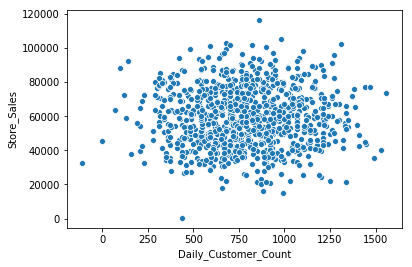

In [217]:
sns.scatterplot(ssales2.Daily_Customer_Count,ssales2.Store_Sales)

In [228]:
# 
x = ssales2[['Daily_Customer_Count']]
x2 =add_constant(x)

In [229]:
log = sm.OLS(ssales2.Store_Sales,x2)

In [230]:
res = log.fit()

In [231]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1676
Date:                Thu, 21 Feb 2019   Prob (F-statistic):              0.682
Time:                        15:28:32   Log-Likelihood:                -10405.
No. Observations:                 931   AIC:                         2.081e+04
Df Residuals:                     929   BIC:                         2.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.861e+04 

In [232]:
# 

In [237]:
# 
x = ssales2.iloc[:,1:4]
x2 =add_constant(x)

In [238]:
log = sm.OLS(ssales2.Store_Sales,x2)

In [239]:
res =log.fit()

In [240]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.074
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           0.000428
Time:                        15:30:59   Log-Likelihood:                -10396.
No. Observations:                 931   AIC:                         2.080e+04
Df Residuals:                     927   BIC:                         2.082e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.685e+04   3117.325     15.028      

In [241]:
############customer analysis

In [242]:
grouped_test2=ssales2[['Parking','Daily_Customer_Count']].groupby(['Parking'])
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Covered')['Daily_Customer_Count'], grouped_test2.get_group('Not Provided')['Daily_Customer_Count'],grouped_test2.get_group('No Parking')['Daily_Customer_Count'], grouped_test2.get_group('Open')['Daily_Customer_Count'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 1.7267824233685336 , P = 0.15985207568105703


In [244]:
mod = ols('Daily_Customer_Count ~ Parking + Coupon_Category', data = ssales2).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)

print(aov_table)

                    df        sum_sq        mean_sq         F    PR(>F)
Parking            3.0  3.641704e+05  121390.129005  1.724852  0.160249
Coupon_Category    2.0  6.781573e+04   33907.863777  0.481802  0.617824
Residual         925.0  6.509885e+07   70377.133019       NaN       NaN


In [245]:
ssales2.Daily_Customer_Count.groupby(ssales2.Coupon_Category).mean()

Coupon_Category
CAT A    796.018237
CAT B    782.005495
CAT C    775.168067
Name: Daily_Customer_Count, dtype: float64

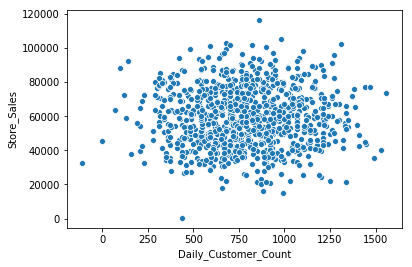

In [246]:
sns.scatterplot(ssales2.Daily_Customer_Count,ssales2.Store_Sales)

In [251]:

ssales2 =pd.get_dummies(ssales2)
x = ssales2.drop('Store_Sales',axis=1)
x2 =add_constant(x)
log = sm.OLS(ssales2.Store_Sales,x2)
res =log.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     73.39
Date:                Thu, 21 Feb 2019   Prob (F-statistic):          4.13e-125
Time:                        15:47:46   Log-Likelihood:                -10092.
No. Observations:                 931   AIC:                         2.021e+04
Df Residuals:                     918   BIC:                         2.027e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.225e+